In [311]:
import pandas as pd
import numpy as np

    
filepath= './data/Energy Indicators.xls'

#read file
energy = pd.read_excel(filepath)

#cleaning data
energy = (energy[16:243]
    .drop(energy.columns[[0, 1]], axis=1)
    .rename(columns={'Environmental Indicators: Energy': 'Country',
                     'Unnamed: 3':'Energy Supply',
                     'Unnamed: 4' : 'Energy Supply per Capita',
                     'Unnamed: 5':'% Renewable'})
    .set_index('Country')
          )


In [312]:
#clean missing values
energy.replace('...',np.nan,inplace =True)
#change rows
rows_to_Change = {"Republic of Korea": "South Korea",
                  "United States of America": "United States",
                  "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                  "China, Hong Kong Special Administrative Region": "Hong Kong"}
#change rows
energy['Energy Supply']*= 1000000

energy = energy.reset_index()
energy.replace({"Country": rows_to_Change},inplace = True)
energy['Country'] = (energy['Country'].apply(lambda x: x.split('(')[0].rstrip(' ').replace(r"\d+",''))
    .apply(lambda a: "".join([x for x in a if x.isalpha()]))
                     )

In [313]:
#open world bank file
wb_path='./data/world_bank.csv'
GDP = pd.read_csv(wb_path,skiprows=4)
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [314]:
#change rows names and clead data
rows_to_Change = {'Korea, Rep.': "South Korea", 
                  "Iran, Islamic Rep.": "Iran",
                  "Hong Kong SAR, China": "Hong Kong"
                 }
GDP.replace({'Country Name': rows_to_Change},inplace=True)
GDP.rename(columns={'Country Name': 'Country'}, inplace=True)
GDP.drop(GDP.columns[1:-10],axis=1, inplace=True)

In [315]:
#read last file
filename_ ='./data/scimagojr-3.xlsx'
ScimEn = pd.read_excel(filename_)
ScimEn.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


In [316]:
df = SciEn.merge(energy,on='Country').merge(GDP, on='Country').set_index('Country')

In [317]:
df.sort_values(by="Rank",inplace=True)
qw1 = df[:15]
qw1

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
Italy,11,10964,10794,111850,26661,10.20,106,6.530000e+09,109.0,33.667230,2.202170e+12,2.234627e+12,2.211154e+12,2.089938e+12,2.125185e+12,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12
Spain,12,9428,9330,123336,23964,13.08,115,4.923000e+09,106.0,37.968590,1.414823e+12,1.468146e+12,1.484530e+12,1.431475e+12,1.431673e+12,1.417355e+12,1.380216e+12,1.357139e+12,1.375605e+12,1.419821e+12
Iran,13,8896,8819,57470,19125,6.46,72,9.172000e+09,119.0,5.707721,3.895523e+11,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN


In [318]:
len(pd.merge(pd.merge(energy,GDP, how='outer'),SciEn,how='outer')) - len(qw1)

347

In [319]:
avgGDP = qw1.loc[:, '2006':'2015'].mean(axis=1).sort_values(ascending=False)

In [320]:
i = avgGDP.index[5]
df.loc[i,'2015'] - df.loc[i,'2006']


-152854060000.00024

In [321]:
qw5 = df['Energy Supply per Capita'].mean(axis=0)

In [322]:
qw5

92.777777777777771

In [323]:
qw6 =  df['% Renewable'].argmax(),df['% Renewable'].max()
print(qw6)

('Albania', 100.0)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


In [324]:
qw_column = 'Self-Citations/Total Citations'
df[qw_column] = ((df['Self-citations'])/sum(df['Self-citations']))
qw7 =  df[qw_column].argmax(), df[qw_column].max()
print(qw7)

('China', 0.49681467938622692)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  This is separate from the ipykernel package so we can avoid doing imports until


In [325]:
qw_column8 = "Energy Supply/Energy Supply per capita"
df[qw_column8] = ((df['Energy Supply'])/(df['Energy Supply per Capita']))
qw8 = df.sort_values(by=qw_column8)
qw8.index[2]

'Gibraltar'

In [326]:
df.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2008,2009,2010,2011,2012,2013,2014,2015,Self-Citations/Total Citations,Energy Supply/Energy Supply per capita
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,...,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.496815,1.367645e+09
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,...,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.074283,1.274094e+08
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.94543,...,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.049394,3.523986e+07
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.90153,...,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.033097,8.036970e+07
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.96908,...,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.044903,1.276731e+09


In [330]:
qw9_row = 'Count of person'
qw9_row1 = 'Citable documents per person'
df[qw9_row] = (df['Energy Supply']/ (df['Energy Supply per Capita']))
df[qw9_row1] = (df['Citable documents']/ (df[qw9_row ]) )

In [334]:
#apply corr
corr = df[qw9_row1].corr(df['Energy Supply per Capita'])
corr

0.53260259049717507

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


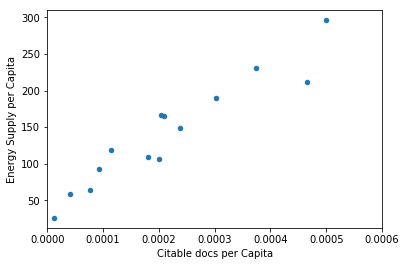

In [341]:

    import matplotlib as plt
    %matplotlib inline
    
    Top15 = qw1
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

plot9()

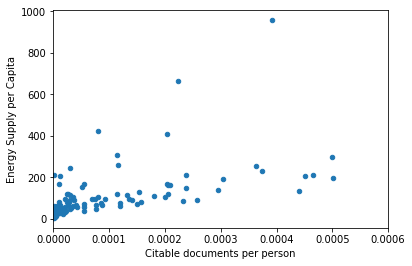

In [343]:
#ploting 
df.plot(x='Citable documents per person', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
plt.show()

In [383]:
top15 = qw1
top15['Renewable group'] = ((top15['% Renewable'] >= top15['% Renewable'].median())
                         .apply(lambda x: 1 if x else 0))
HighRenew = top15.sort_values(by = 'Rank',ascending=False)
HighRenew

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2009,2010,2011,2012,2013,2014,2015,PopEst,Citable docs per Capita,Renewable group
Country,,,,,,,,,,,,,,,,,,,,,
Sweden,20,4565,4494,57889,9632,12.68,95,2.044000e+09,212.0,46.598460,...,4.607834e+11,4.883793e+11,5.013917e+11,4.999562e+11,5.061616e+11,5.176362e+11,5.388264e+11,9.641509e+06,0.000466,1
Netherlands,19,5170,5105,48351,6067,9.35,85,3.199000e+09,190.0,6.324659,...,8.248696e+11,8.364397e+11,8.503550e+11,8.413664e+11,8.371985e+11,8.456636e+11,8.624973e+11,1.683684e+07,0.000303,0
Norway,18,5675,5634,32693,6024,5.76,74,1.388000e+09,273.0,97.635580,...,4.259607e+11,4.285247e+11,4.326762e+11,4.445694e+11,4.490094e+11,4.589539e+11,4.662883e+11,5.084249e+06,0.001108,1
Turkey,17,5879,5827,91857,23165,15.62,104,4.897000e+09,64.0,28.536690,...,6.698319e+11,7.311681e+11,7.953116e+11,8.122315e+11,8.462844e+11,8.718432e+11,9.065849e+11,7.651562e+07,0.000076,1
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.648030,...,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12,2.059153e+08,0.000042,1
Australia,14,8831,8725,90765,15606,10.28,107,5.386000e+09,231.0,11.810810,...,1.119654e+12,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12,2.331602e+07,0.000374,0
Iran,13,8896,8819,57470,19125,6.46,72,9.172000e+09,119.0,5.707721,...,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN,7.707563e+07,0.000114,0
Spain,12,9428,9330,123336,23964,13.08,115,4.923000e+09,106.0,37.968590,...,1.431475e+12,1.431673e+12,1.417355e+12,1.380216e+12,1.357139e+12,1.375605e+12,1.419821e+12,4.644340e+07,0.000201,1
Italy,11,10964,10794,111850,26661,10.20,106,6.530000e+09,109.0,33.667230,...,2.089938e+12,2.125185e+12,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12,5.990826e+07,0.000180,1


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2011,2012,2013,2014,2015,Self-Citations/Total Citations,Energy Supply/Energy Supply per capita,Count of person,Citable documents per person,Renewable group
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,...,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.496815,1.367645e+09,1.367645e+09,9.268998e-05,0
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,...,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.074283,1.274094e+08,1.274094e+08,2.377140e-04,0
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,...,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.049394,3.523986e+07,3.523986e+07,5.000019e-04,1
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.033097,8.036970e+07,8.036970e+07,2.094197e-04,0
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.044903,1.276731e+09,1.276731e+09,1.162422e-05,0
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,...,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.034515,6.383735e+07,6.383735e+07,2.032196e-04,0
Italy,11,10964,10794,111850,26661,10.20,106,6.530000e+09,109.0,33.667230,...,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12,0.032174,5.990826e+07,5.990826e+07,1.801755e-04,1
Spain,12,9428,9330,123336,23964,13.08,115,4.923000e+09,106.0,37.968590,...,1.417355e+12,1.380216e+12,1.357139e+12,1.375605e+12,1.419821e+12,0.028920,4.644340e+07,4.644340e+07,2.008897e-04,1
Iran,13,8896,8819,57470,19125,6.46,72,9.172000e+09,119.0,5.707721,...,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN,0.023080,7.707563e+07,7.707563e+07,1.144201e-04,0
